# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) si [matplotlib](https://matplotlib.org/).

In [1]:
import sys
print(sys.executable)


c:\Users\Cosmin\AppData\Local\Programs\Python\Python311\python.exe


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage,datasets
from scipy.fft import dctn, idctn

print(np.__version__)

C:\Users\Cosmin\AppData\Local\Temp\ipykernel_21636\3880596929.py:3: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc, ndimage,datasets


2.2.6


# Imaginea cu care lucram

Vom folosi o imagine din setul de date oferit implicit de catre scipy.

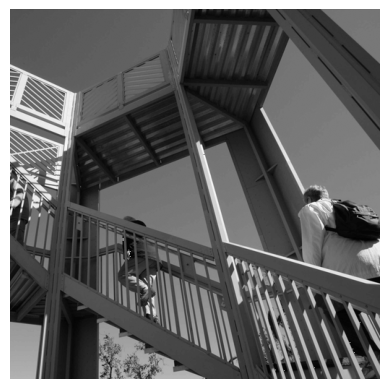

In [3]:
X = datasets.ascent()
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.show()

  # Transformata DCT a unei imagini

  Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

  $$
  Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
                \sum_{n_2=0}^{N_2-1}
                x_{n_1,n_2}
                \cos\left[\frac{\pi}{N_1}m_1
                  \left(n_1 + \frac12\right)\right]
                \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
  $$

  * unde $n_1$ si $n_2$ sunt pozitile pixelilor pe orizontala, respectiv, pe verticala
  * bin-urile rezultate corespund pozitiilor pixelilor
  * spectrul este in continuare simetric si par
  * proprietatile transformatei DCT-II sunt respectate si in cazul celei 2D

  in Python avem rutina `scipy.fft.dct` pentru 1D si `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinata automat dupa forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

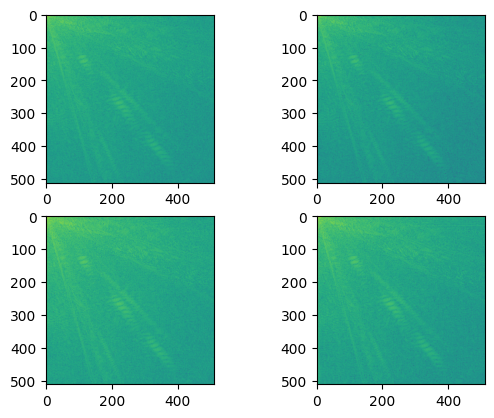

In [5]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecventelor DCT incepand cu *bin*-ul `k` dupa care aplicam transformata DCT inversa (similar cu tema anterioara):

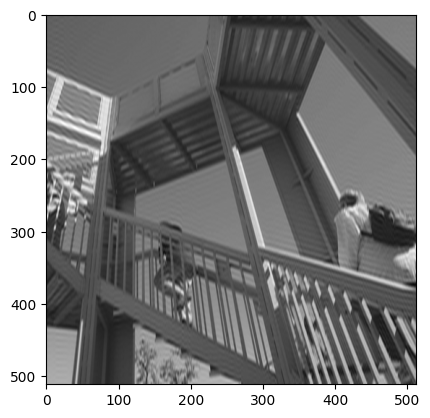

In [6]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB in Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea in frecventa cu $Q$ dat de standardul JPEG
4. compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastra de test este monocroma, deci nu necesita pasul 1, dar putem efectua o operatie de *down-sampling* in preprocesare precum am prezentat la curs.

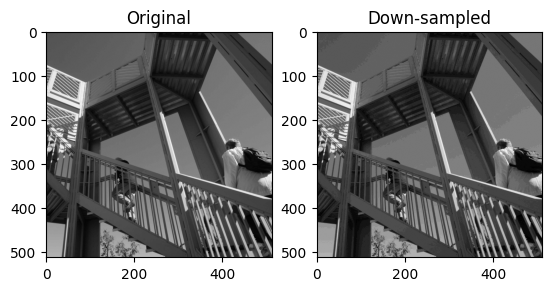

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplica DCT si cuantizare.

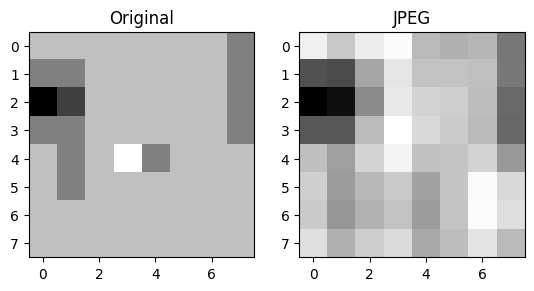

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [ ]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente in frecventa:' + str(y_nnz) + 
      '\nComponente in frecventa dupa cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completati algoritmul JPEG incluzand toate blocurile din imagine.

2. [4p] Extindeti la imagini color (incluzand transformarea din RGB in Y'CbCr).

3. [6p] Extindeti algoritmul pentru compresia imaginii pana la un prag MSE impus de utilizator.

4. [4p] Extindeti algoritmul pentru compresie video. Demonstrati pe un clip scurt din care luati fiecare cadru si il tratati ca pe o imagine.

In [ ]:
M, N = X.shape

# M va fi inaltimea (numarul de randuri)
# N va fi Latimea (numarul de coloane)

print(M,N)

512 512


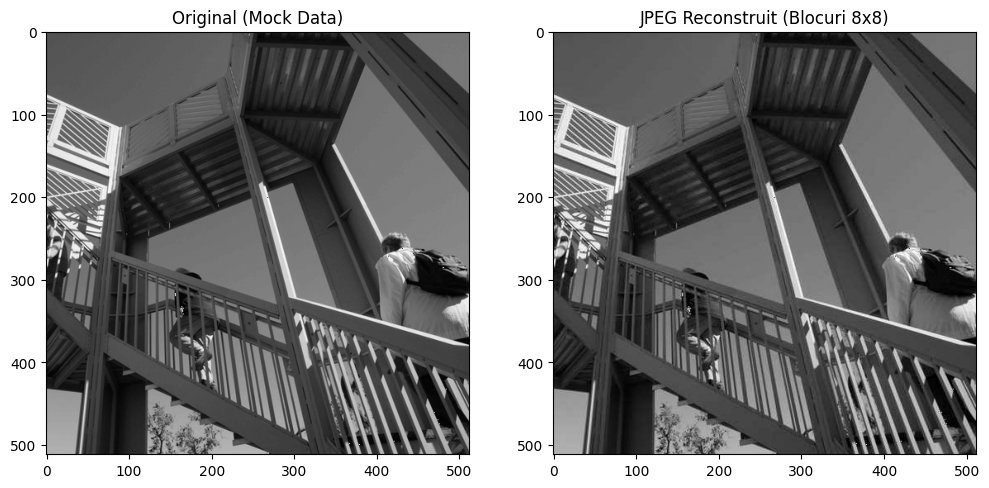

Componente în frecvență înainte de cuantizare (total): 250398
Componente în frecvență după cuantizare (total): 36658


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn, idctn

image_size,_ =X.shape
x=X
x = x.astype(np.float64)

# Matricea de Cuantizare standard Luminance (Q)
Q = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# Parametri
B = 8 
M, N = x.shape

# Initializare array-uri pentru rezultate
y_total = np.zeros_like(x) # Pentru coeficientii cuantizati
x_jpeg_reconstructed = np.zeros_like(x) # Pentru imaginea finala

# Initializare pentru numararea componentelor non-zero
y_nnz_block = 0 
y_jpeg_nnz_block = 0

# --- IMPLEMENTARE JPEG PE BLOCURI 8x8 ---

for i in range(0, M, B):
    for j in range(0, N, B):
        
        # Extragerea blocului de 8x8
        block = x[i:i+B, j:j+B]
        
        # 1. Aplicarea DCT (Transformarea)
        # Se foloseste DCT de tip 2 si norma 'ortho'
        dct_block = dctn(block, type=2, norm='ortho')
        
        # Numaram componentele non-zero inainte de cuantizare
        y_nnz_block += np.count_nonzero(dct_block)
        
        # 2. Cuantizarea (Compresia Lossy)
        y_jpeg_block = np.round(dct_block / Q)
        
        # Numaram componentele non-zero dupa cuantizare
        y_jpeg_nnz_block += np.count_nonzero(y_jpeg_block)
        
        # Salvarea DCT cuantizata 
        y_total[i:i+B, j:j+B] = y_jpeg_block
        
        # --- Partea de Decompresie (pentru reconstructie) ---
        
        # 3. De-cuantizarea
        dequantized_block = y_jpeg_block * Q
        
        # 4. Aplicarea IDCT (Reconstructia)
        idct_block = idctn(dequantized_block, type=2, norm='ortho')
        
        # Salvarea blocului reconstruit
        x_jpeg_reconstructed[i:i+B, j:j+B] = idct_block
        
# --- Finalizare si Afisare ---


x_jpeg_final = np.clip(x_jpeg_reconstructed, 0, 255).astype(np.uint8)
x_original = np.clip(x, 0, 255).astype(np.uint8)

# Afisarea rezultatelor 
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(x_original, cmap=plt.cm.gray)
plt.title('Original (Mock Data)')

plt.subplot(122)
plt.imshow(x_jpeg_final, cmap=plt.cm.gray)
plt.title('JPEG Reconstruit (Blocuri 8x8)')
plt.show()

# Printarea numarului de componente 
print('Componente in frecventa inainte de cuantizare (total): ' + str(y_nnz_block))
print('Componente in frecventa dupa cuantizare (total): ' + str(y_jpeg_nnz_block))

Pragul MSE Impus: 50000.00
Q-Factor Optim Gasit: 1
MSE Final Obtinut: 574.87


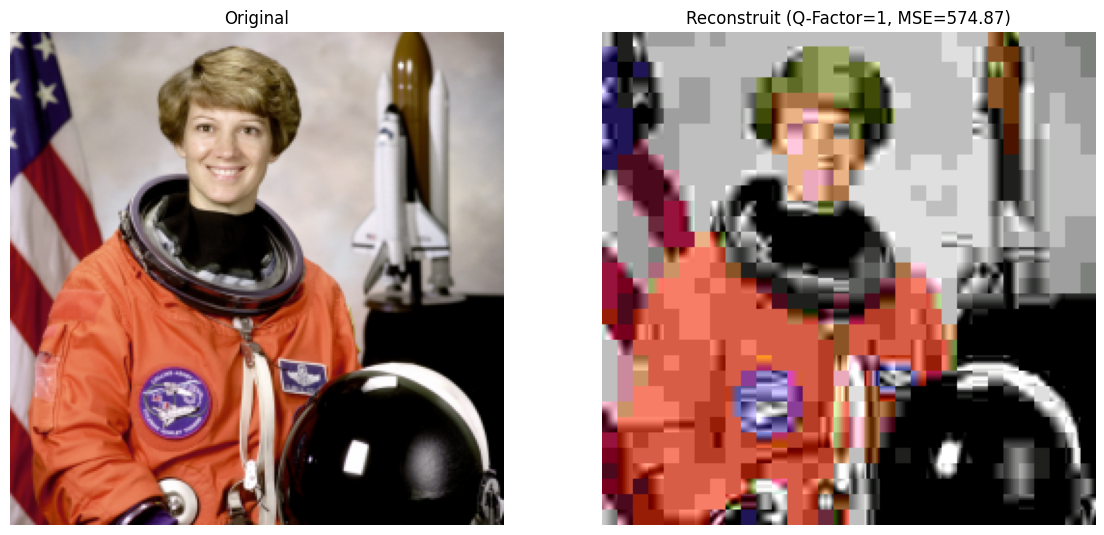

In [14]:
import numpy as np
from skimage import data, transform
from scipy.fft import dctn, idctn
from skimage import data, transform

# 1. incarcarea imaginii color standard
img_original = data.astronaut() 

# 2. Scalarea la o dimensiune multipla de 8
img_scaled = transform.resize(
    img_original, 
    (256, 256), 
    anti_aliasing=True, 
    preserve_range=True
)

x_rgb_original = img_scaled.astype(np.float64)

Q_BASE = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# --- Factorul de scalare  ---
def get_scaling_factor(Q_factor):
    if Q_factor >= 50:
        S = 200 - 2 * Q_factor
    else:
        S = 5000 / Q_factor
    return S / 100.0

# --- FUNCTIA JEPG  ---
def jpeg_compress_decompress(x_rgb_original, Q_factor):
    
    # 1. Scalarea Matricilor de Cuantizare
    S = get_scaling_factor(Q_factor)
    Q_Y = np.clip(np.round(Q_BASE * S), 1, 255) # Q nu poate fi 0
    Q_CbCr = np.clip(np.round(Q_Y * 1.5), 1, 255) # Crominanta e mai agresiva
    

    def rgb_to_ycbcr(rgb_image):
        R, G, B = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
        Y = 0.299 * R + 0.587 * G + 0.114 * B
        Cb = -0.1687 * R - 0.3313 * G + 0.5 * B
        Cr = 0.5 * R - 0.4187 * G - 0.0813 * B
        return np.stack([Y, Cb + 128, Cr + 128], axis=2)

    def ycbcr_to_rgb(ycbcr_image):
        Y, Cb_shifted, Cr_shifted = ycbcr_image[:, :, 0], ycbcr_image[:, :, 1], ycbcr_image[:, :, 2]
        Cb = Cb_shifted - 128
        Cr = Cr_shifted - 128
        R = Y + 1.402 * Cr
        G = Y - 0.34414 * Cb - 0.71414 * Cr
        B = Y + 1.772 * Cb
        return np.stack([R, G, B], axis=2)
    
    # --- PROCESARE ---
    x_ycbcr_original = rgb_to_ycbcr(x_rgb_original)
    x_ycbcr_reconstructed = np.zeros_like(x_ycbcr_original)
    M, N, D = x_rgb_original.shape
    B = 8
    
    for channel_idx in range(D):
        channel_original = x_ycbcr_original[:, :, channel_idx]
        channel_reconstructed = np.zeros_like(channel_original)
        
        Q_matrix = Q_Y if channel_idx == 0 else Q_CbCr
            
        for i in range(0, M, B):
            for j in range(0, N, B):
                block = channel_original[i:i+B, j:j+B]
                dct_block = dctn(block, type=2, norm='ortho')
                
                # Cuantizare
                y_jpeg_block = np.round(dct_block / Q_matrix)
                
                # De-cuantizare & IDCT
                dequantized_block = y_jpeg_block * Q_matrix
                idct_block = idctn(dequantized_block, type=2, norm='ortho')
                
                channel_reconstructed[i:i+B, j:j+B] = idct_block
                
        x_ycbcr_reconstructed[:, :, channel_idx] = channel_reconstructed

    x_rgb_reconstructed = ycbcr_to_rgb(x_ycbcr_reconstructed)
    x_rgb_final = np.clip(x_rgb_reconstructed, 0, 255)
    
    # 2. Calculul MSE
    mse = np.mean((x_rgb_original - x_rgb_final)**2)
    
    return mse, x_rgb_final.astype(np.uint8)

# --- ALGORITM DE CAUTARE PENTRU MSE PRAG ---

MSE_TARGET = 50000.0
Q_factor = 1 # incepem cu cea mai slaba calitate (factor de compresie maxim)
MSE_curent = float('inf')
Q_optim = 100 # Vom salva cel mai bun Q_factor

# Cautare liniara simpla (de la 1 la 100)
for Q_current in range(1, 101): 
    
    mse, x_reconstruit = jpeg_compress_decompress(x_rgb_original, Q_current)
    
    if mse < MSE_TARGET:
        Q_optim = Q_current
        MSE_curent = mse
        break # Oprim cand gasim primul Q_factor care indeplineste conditia
    elif Q_current == 100:
        Q_optim = 100
        MSE_curent = mse

# Rulam ultima oara cu Q_optim pentru a obtine imaginea finala
mse_final, x_final = jpeg_compress_decompress(x_rgb_original, Q_optim)


# --- AFIsARE REZULTATE FINALE ---
print(f"Pragul MSE Impus: {MSE_TARGET:.2f}")
print(f"Q-Factor Optim Gasit: {Q_optim}")
print(f"MSE Final Obtinut: {mse_final:.2f}")

plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.imshow(x_rgb_original.astype(np.uint8))
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(x_final)
plt.title(f'Reconstruit (Q-Factor={Q_optim}, MSE={mse_final:.2f})')
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import cv2
import os
from scipy.fft import dctn, idctn

# --- MATRICI DE CUANTIZARE (Q) ---
Q_BASE = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61], [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56], [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77], [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101], [72, 92, 95, 98, 112, 100, 103, 99]
])

def get_scaling_factor(Q_factor):
    """Calculeaza factorul de scalare in functie de Q-factor."""
    S = (200 - 2 * Q_factor) if Q_factor >= 50 else (5000 / Q_factor)
    return S / 100.0

def jpeg_block_compress_decompress(frame_rgb, Q_factor):
    """Aplica algoritmul JPEG (Y'CbCr, DCT, Cuantizare, IDCT) unui singur cadru."""
    
    # Relatiile de conversie (standard JPEG)
    def rgb_to_ycbcr(rgb_image):
        Y = 0.299 * rgb_image[:, :, 0] + 0.587 * rgb_image[:, :, 1] + 0.114 * rgb_image[:, :, 2]
        Cb = -0.1687 * rgb_image[:, :, 0] - 0.3313 * rgb_image[:, :, 1] + 0.5 * rgb_image[:, :, 2]
        Cr = 0.5 * rgb_image[:, :, 0] - 0.4187 * rgb_image[:, :, 1] - 0.0813 * rgb_image[:, :, 2]
        # Adaugam 128 pentru a mentine Cb/Cr in gama pozitiva
        return np.stack([Y, Cb + 128, Cr + 128], axis=2)

    def ycbcr_to_rgb(ycbcr_image):
        Y, Cb, Cr = ycbcr_image[:, :, 0], ycbcr_image[:, :, 1] - 128, ycbcr_image[:, :, 2] - 128
        R = Y + 1.402 * Cr
        G = Y - 0.34414 * Cb - 0.71414 * Cr
        B = Y + 1.772 * Cb
        return np.stack([R, G, B], axis=2)
     
    # 1. Scalarea Matricilor Q
    S = get_scaling_factor(Q_factor)
    Q_Y = np.clip(np.round(Q_BASE * S), 1, 255)
    Q_CbCr = np.clip(np.round(Q_Y * 1.5), 1, 255) # Crominanta e mai agresiva
    
    # 2. Conversia RGB -> Y'CbCr
    x_ycbcr = rgb_to_ycbcr(frame_rgb.astype(np.float64))
    x_ycbcr_reconstructed = np.zeros_like(x_ycbcr)
    
    M, N, D = frame_rgb.shape
    B = 8

    # 3. Procesare pe canale si blocuri 8x8
    for channel_idx in range(D):
        channel_original = x_ycbcr[:, :, channel_idx]
        channel_reconstructed = np.zeros_like(channel_original)
        Q_matrix = Q_Y if channel_idx == 0 else Q_CbCr
            
        for i in range(0, M, B):
            for j in range(0, N, B):
                block = channel_original[i:i+B, j:j+B]
                
                # DCT -> Cuantizare -> De-cuantizare -> IDCT
                dct_block = dctn(block, type=2, norm='ortho')
                y_jpeg_block = np.round(dct_block / Q_matrix)
                dequantized_block = y_jpeg_block * Q_matrix
                idct_block = idctn(dequantized_block, type=2, norm='ortho')
                
                channel_reconstructed[i:i+B, j:j+B] = idct_block
                
        x_ycbcr_reconstructed[:, :, channel_idx] = channel_reconstructed

    # 4. Conversia finala Y'CbCr -> RGB
    x_rgb_reconstructed = ycbcr_to_rgb(x_ycbcr_reconstructed)
    # Clip la gama 0-255 si conversie la uint8
    x_rgb_final = np.clip(x_rgb_reconstructed, 0, 255).astype(np.uint8)
    
    return x_rgb_final

# --- FUNCTIA PRINCIPALA DE PROCESARE VIDEO ---

def process_video(input_path, output_dir, Q_factor):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Eroare: Nu s-a putut deschide fisierul video la calea: {input_path}")
        return

    frame_count = 0
    
    while cap.isOpened():
        ret, frame_bgr = cap.read() 
        
        if not ret:
            break # Am ajuns la sfarsitul clipului
        
        # 1. OpenCV citeste in BGR. Trebuie convertit la RGB
        frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        
        # 2. Aplicarea Compresiei JPEG (cadru cu cadru)
        frame_jpeg_rgb = jpeg_block_compress_decompress(frame_rgb, Q_factor)
        
        # 3. Conversia inapoi la BGR pentru a salva cu OpenCV
        frame_jpeg_bgr = cv2.cvtColor(frame_jpeg_rgb, cv2.COLOR_RGB2BGR)
        
        # 4. Salvarea cadrului procesat in director
        output_filename = os.path.join(output_dir, f"frame_{frame_count:04d}_q{Q_factor}.png")
        cv2.imwrite(output_filename, frame_jpeg_bgr)
        
        frame_count += 1
        
    cap.release()
    print(f"Procesare finalizata! Au fost procesate {frame_count} cadre.")
    print(f"Cadrele reconstruite (format PNG) sunt salvate in directorul: {output_dir}")

# --- EXECUTARE (EXEMPLU) ---

input_video_path = r"D:\Prelucrarea-Semnalelor\ProiectJPEG\baloane.mp4" 

# Directorul unde vor fi salvate cadrele reconstruite
output_directory = "cadre_jpeg_reconstuite"

# Factorul de Calitate
Q_FACTOR = 10

process_video(input_video_path, output_directory, Q_FACTOR)

KeyboardInterrupt: 